<h1 style="color:DodgerBlue;">Random Forest Algorithm </h1>

## Table of Contents
1. Introduction
2. Algorithm Overview
3. Random Forest Construction
   - Bagging
   - Random Feature Selection
   - Ensemble Voting
4. Random Forest Learning Process
   - Building Individual Trees
   - Combining Predictions
5. Advantages and Disadvantages
6. Implementation Example
7. Conclusion

## 1. Introduction
The Random Forest algorithm is an ensemble learning technique widely used for classification and regression tasks. It builds multiple decision trees during training and combines their outputs to improve the overall predictive performance.
## 2. Algorithm Overview
Random Forests are composed of multiple decision trees. Each tree is trained on a different subset of the data and potentially with different subsets of features. The algorithm then aggregates the predictions of individual trees to make a final prediction.

<img src="https://databasecamp.de/wp-content/uploads/random-forest-structure-1024x767.png" width=450 height=250/>

## 3. Random Forest Construction
### - Bagging and Boosting
**Bagging–** It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.
<br>**Boosting–** It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST.

<img src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcSfyarz4UkvZH8OmRs1wrOSOuxp-MPztDjL27Npm9nCboaBvOnL" width=400 height=400 />



### - Random Feature Selection
For each tree, a random subset of features is selected for training. This adds another layer of randomness, preventing the dominance of a single feature in the decision-making process.

### - Ensemble Voting
During prediction, the class predicted by each individual tree is counted as a "vote." 

<img src="https://serokell.io/files/vz/vz1f8191.Ensemble-of-decision-trees.png" width=600 height=600 />
- The class with the most votes is considered the final prediction. 
- For regression tasks, the average prediction of all trees is taken.

## 4.Random Forest Learning Process
### - Building Individual Trees
For each tree in the forest:

- A subset of the training data is selected using bagging.
- A random subset of features is selected.
- The tree is constructed using a recursive binary splitting process, similar to Decision Trees.

### - Combining Predictions
During prediction, each tree's output is combined through majority voting (classification) or averaging (regression) to make the final prediction. This ensemble approach helps to improve the overall accuracy and robustness of the model..

## 5. Advantages and Disadvantages
### Advantages:
- Reduces overfitting by averaging out individual tree biases.
- Handles both categorical and numerical data.
- Robust to noisy data and outliers.
- Provides feature importance scores.

### Disadvantages:
- Increased computational complexity compared to single decision trees.
- Interpretability decreases as the number of trees increases.
- Can become memory-intensive for large datasets.

## 6. Implementation Example
Below is an example implementation of the Random Forest algorithm using the Breast Cancer dataset from Kaggle.

## 7. Conclusion
Random Forests are a powerful ensemble learning technique that combines the strengths of multiple decision trees. By introducing randomness in both data sampling and feature selection, they mitigate overfitting and improve generalization. Understanding the inner workings of Random Forests allows data scientists to effectively leverage this algorithm for various classification and regression tasks.

#### Import necessary libraries
 Import the necessary libraries for data manipulation, model training, evaluation, and visualization.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#### Load the dataset & Explore the dataset
Display the first few rows of the dataset and print its information to understand its structure.

In [2]:
data = pd.read_csv("C:/Users/varsh/Documents/MSc/ML_Algo/Classification/Breast Cancer.csv")

# 
data.head()

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_1ean              569 non-null    float64
 3   texture_1ean             569 non-null    float64
 4   peri1eter_1ean           569 non-null    float64
 5   area_1ean                569 non-null    float64
 6   s1oothness_1ean          569 non-null    float64
 7   co1pactness_1ean         569 non-null    float64
 8   concavity_1ean           569 non-null    float64
 9   concave points_1ean      569 non-null    float64
 10  sy11etry_1ean            569 non-null    float64
 11  fractal_di1ension_1ean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri1eter_se             5

In [4]:
#Dropping id since it does not make any sense
data = data.drop('id', axis=1)

####  Separate features and target variable
Separate the features as (X) and the target variable as (y) from the dataset.
<br>The target variable here is type of the diabetes malignant(1) and benign(0)

In [5]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

#### Split the data into training and testing sets
Split the data into training and testing sets using a 80-20 split ratio. This allows us to evaluate the model's performance on unseen data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Initialize the Decision Tree model
Create an instance of the DecisionTreeClassifier with a specified random state for reproducibility.
<br>Train the Decision Tree model using the training data (X_train and y_train).
<br>Use the trained model to make predictions on the test data (X_test).

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

#### Calculate Performance
Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



C:\Users\varsh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


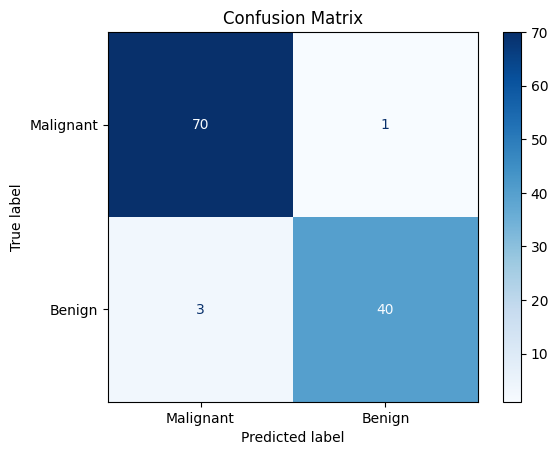

In [8]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Visualize the confusion matrix
plot_confusion_matrix(rf_model, X_test, y_test, display_labels=["Malignant", "Benign"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

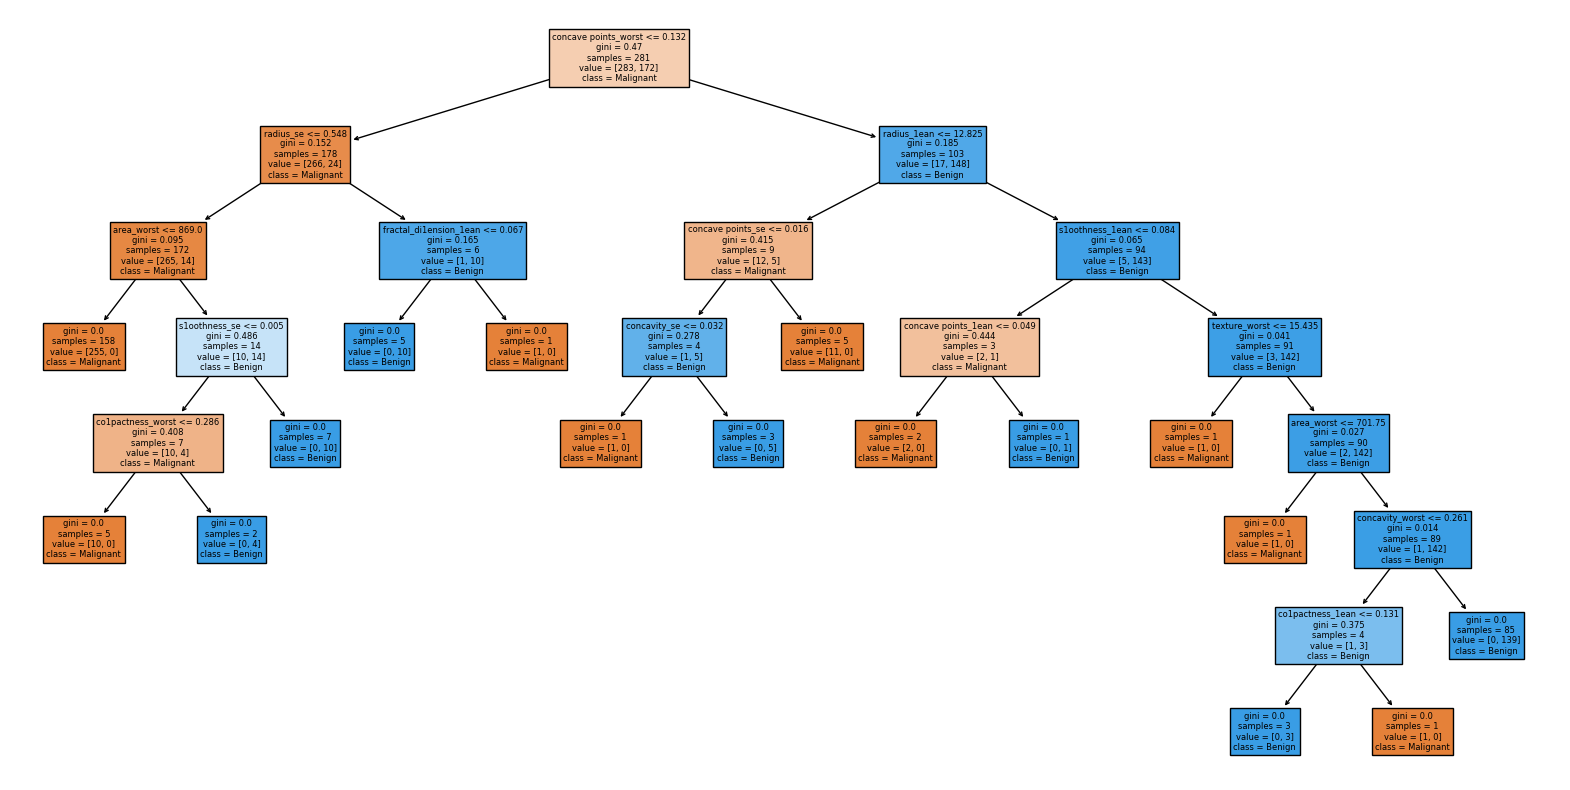

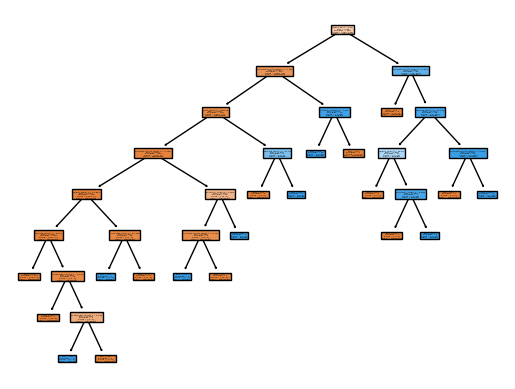

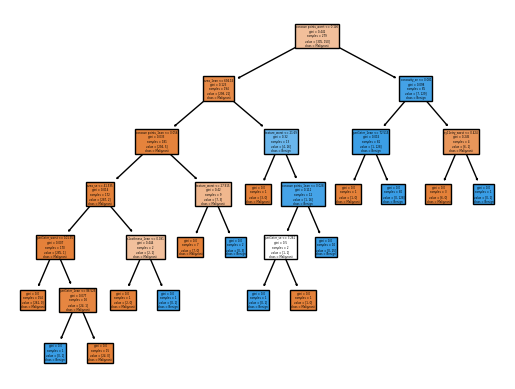

In [9]:
# Visualize the few decision tree
plt.figure(figsize=(20, 10))
i=0
No_of_Tree=3
for estimator in rf_model.estimators_:
    plot_tree(estimator, feature_names=X.columns, class_names=["Malignant", "Benign"], filled=True)
    plt.show()
    i=i+1
    if i ==No_of_Tree:
        break

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 96.49%
